In [19]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.color import rgb2gray
from skimage import filters, measure#, feature, img_as_float
from skimage.draw import polygon_perimeter
from skimage.morphology import binary_dilation,binary_erosion,dilation,erosion
from sklearn import metrics
# from scipy import signal, misc, ndimage
# from PIL import Image, ImageFilter

In [22]:
from sklearn.model_selection import train_test_split 

In [ ]:
!apt-get install poppler-utils

Reading package lists... Done
Building dependency tree       
Reading state information... Done
poppler-utils is already the newest version (0.62.0-2ubuntu2.12).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [ ]:
pip install pdf2image


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Connect to drive

In [7]:
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

Mounted at /gdrive


# To convert pdf to image

In [ ]:
from pdf2image import convert_from_path
pages = convert_from_path('/gdrive/My Drive/Mini Project/NewDataset/3tb-1.pdf')
print('happened')
# pagecounter = 1
for i in range(len(pages)):
  print(i)
  pages[i].save("/gdrive/My Drive/Mini Project/NewDataset/pages/a"+str(i)+".jpg", 'JPEG')
  # pagecounter+=1

In [ ]:
#function to plot the image
def plot_image(image, title=""):
  plt.imshow(image), plt.title(title, size=14), plt.axis('off')

# Image processing


In [ ]:
#function to plot the image
def plot_image(image, title=""):
  plt.imshow(image), plt.title(title, size=14), plt.axis('off')

In [ ]:
#Reading the image
# im=imread("/gdrive/My Drive/Mini Project/Images/Image69.jpg") #Add mini project shortcut to drive
# imgcounter = 0
def imgprocessing(im, file):
  imgcounter = 0
  #Graying of image
  gray_im = rgb2gray(im)

  #Edge detection using sobel operator
  edges = filters.sobel(gray_im)

  #Enhancing connectivity using morphological operations 

  morph = binary_dilation(binary_dilation(binary_dilation(binary_dilation(binary_erosion(binary_dilation(edges))))))
  #morph=binary_dilation(binary_erosion(binary_dilation(edges)))

  contours = measure.find_contours(morph, 0.8)
  newContour=[]

  for contour in contours:
    # print(len(contour))
    # Expand numpy dimensions
    c = np.expand_dims(contour.astype(np.float32), 1)
    # Convert it to UMat object
    c = cv2.UMat(c)
    area = cv2.contourArea(c)
    # ax.plot(contour[:, 1], contour[:, 0], linewidth=2)
    if(area>10000):
      # print(area)
      newContour.append(contour)
      



  bounding_boxes = []

  for contour in newContour:
      Xmin = np.min(contour[:,0])
      Xmax = np.max(contour[:,0])
      Ymin = np.min(contour[:,1])
      Ymax = np.max(contour[:,1])
      bounding_boxes.append([Xmin, Xmax, Ymin, Ymax])
  with_boxes  = np.copy(im)
  # with_boxes=np.zeros(im.shape,dtype=np.uint8)

  # for box in bounding_boxes:
  #     #[Xmin, Xmax, Ymin, Ymax]
  #     r = [box[0],box[1],box[1],box[0], box[0]]
  #     c = [box[3],box[3],box[2],box[2], box[3]]
  #     rr, cc = polygon_perimeter(r, c, with_boxes.shape,clip= True )
  #     # rr, cc = polygon_perimeter(r, c )
  #     # with_boxes[rr, cc] = (159,43,104) #set color white
    
  # plt.figure(figsize=(20,10))
  # plot_image(with_boxes,'Bounding boxes')
  # # plt.imshow(with_boxes, interpolation='nearest')
  # plt.show()


  blocks=[]
  for box in bounding_boxes:
    x1=int(box[0])
    x2=int(box[1])
    y1=int(box[2])
    y2=int(box[3])
    blocks.append(gray_im[x1:x2,y1:y2])



  i=1
  plt.figure(figsize=(20,10))
  for im in blocks:
    # plt.subplot(4,2,i)
    # plot_image(im,"bounding box: "+str(i))
    #saves bounding boxes to drive
    # plt.imsave("/gdrive/My Drive/Mini Project/NewOutput/"+file+"-"+str(imgcounter)+".jpg", im) 
    imgcounter+=1
    i+=1
  plt.show()  

# **Creating Dataset**


In [ ]:
import os
path = "/gdrive/My Drive/Mini Project/NewDataset/pages/"
dir_list = os.listdir(path)
  
print("Files and directories in '", path, "' :") 
  
# print the list
print(dir_list)

Files and directories in ' /gdrive/My Drive/Mini Project/NewDataset/pages/ ' :
['c15.jpg', 'c30.jpg', 'c0.jpg', 'c48.jpg', 'c49.jpg', 'c47.jpg', 'c46.jpg', 'c44.jpg', 'c45.jpg', 'c43.jpg', 'c9.jpg', 'c11.jpg', 'c14.jpg', 'c10.jpg', 'c12.jpg', 'c13.jpg', 'c8.jpg', 'c28.jpg', 'c29.jpg', 'c42.jpg', 'c40.jpg', 'c41.jpg', 'c38.jpg', 'c37.jpg', 'c39.jpg', 'c36.jpg', 'c27.jpg', 'c26.jpg', 'c23.jpg', 'c24.jpg', 'c25.jpg', 'c22.jpg', 'c21.jpg', 'c20.jpg', 'c18.jpg', 'c17.jpg', 'c19.jpg', 'c16.jpg', 'c35.jpg', 'c7.jpg', 'c6.jpg', 'c3.jpg', 'c2.jpg', 'c4.jpg', 'c5.jpg', 'c1.jpg', 'c34.jpg', 'c33.jpg', 'c32.jpg', 'c31.jpg', 'd12.jpg', 'd14.jpg', 'd13.jpg', 'd11.jpg', 'd41.jpg', 'd37.jpg', 'd38.jpg', 'd39.jpg', 'd40.jpg', 'd36.jpg', 'd35.jpg', 'd10.jpg', 'd9.jpg', 'd8.jpg', 'd7.jpg', 'd6.jpg', 'd5.jpg', 'd4.jpg', 'd2.jpg', 'd3.jpg', 'd1.jpg', 'd28.jpg', 'd29.jpg', 'd27.jpg', 'd25.jpg', 'd26.jpg', 'd23.jpg', 'd24.jpg', 'd22.jpg', 'd49.jpg', 'd34.jpg', 'd21.jpg', 'd20.jpg', 'd17.jpg', 'd19.jpg', 'd18

In [ ]:
# im=imread("/gdrive/My Drive/Mini Project/NewDataset/pages/a0.jpg") #Add mini project shortcut to drive
# imgprocessing(im,"a0")

<Figure size 1440x720 with 0 Axes>

In [ ]:
# imgcounter = 0
# for file in dir_list:
#   im=imread("/gdrive/My Drive/Mini Project/NewDataset/pages/"+file) #Add mini project shortcut to drive
#   text = file.split(".")
#   imgprocessing(im,text[0])

# Loading dataset

In [5]:
import cv2
import glob
import numpy as np
from skimage.feature import hog
from sklearn import preprocessing
from sklearn.svm import SVC
import joblib
from sklearn.metrics import classification_report
# from sklearn.externals import joblib
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline



def preprocess(path):
    img = cv2.imread(path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    image = cv2.resize(img, (128,64))#figure out what size we have to rezie the image to
    return image

def extractfeat(path):
    list_hog_fd = []
    # list_hog_image=[]
    for files in os.listdir(path):
        img = preprocess(path + files)
        # print(path + "/" + files)
        fd, hog_image= hog(img, orientations=9, pixels_per_cell=(8,8),
                                cells_per_block=(2, 2), visualize=True)
        # list_hog_image.append(hog_image)
        list_hog_fd.append(fd)
    
    hog_features = np.array(list_hog_fd, 'float64')
    return hog_features

In [8]:
Text_path = "/gdrive/My Drive/Mini Project/NewOutput/TextDataset/"
Non_Text_path = "/gdrive/My Drive/Mini Project/NewOutput/NonTextDataset/"

# test_path = "/gdrive/My Drive/Mini Project/Dummy Dataset/crossvalidation-set/text/"
# Non_test_path = "/gdrive/My Drive/Mini Project/Dummy Dataset/crossvalidation-set/non_text"


print("Extracting text ")
text = extractfeat(Text_path)
print("Extracting non text")
nontext = extractfeat(Non_Text_path)

trainfeat = np.vstack((text,nontext))

trainfeat = preprocessing.normalize(trainfeat)


print("Saving Features....")
np.save("./trainfeat.mat",trainfeat)
print("Saved")

trainlabeltext = np.ones(len(os.listdir(Text_path)))
trainlabelnontext = np.zeros(len(os.listdir(Non_Text_path )))
trainlabel = np.hstack((trainlabeltext,trainlabelnontext))

Extracting Features(0%)
Extracting Features(25%)
Saving Features....
Saved


In [16]:
type(trainlabel)
trainlabel.shape

(916,)

In [15]:
type(trainfeat)
trainfeat.shape

(916, 3780)

In [23]:
trainfeat,testfeat,trainlabel,testlabel= train_test_split(trainfeat,trainlabel, test_size=0.2, random_state=25)

# Random Forest

In [24]:
from sklearn.ensemble import RandomForestClassifier
rfclassifier = RandomForestClassifier(max_depth=15)
rfclassifier.fit(trainfeat, trainlabel)

RandomForestClassifier(max_depth=15)

In [25]:
print("accuracy on training data: {}".format(rfclassifier.score(trainfeat,trainlabel)))
print("accuracy on test data: {}".format(rfclassifier.score(testfeat,testlabel)))

accuracy on training data: 1.0
accuracy on test data: 0.9184782608695652


# SVM Classifier


In [26]:
svclassifier = SVC(kernel='rbf')
svclassifier.fit(trainfeat, trainlabel)
print("Training Model.....")
y_pred_train = svclassifier.predict(trainfeat)
y_pred_test = svclassifier.predict(testfeat)
print("Done")
# print("Training:"+classification_report(trainlabel, y_pred_train))
# print("Testing:"+classification_report(testlabel, y_pred_test))
print("Training:"+str(metrics.accuracy_score(trainlabel, y_pred_train)))
print("Testing:"+str(metrics.accuracy_score(testlabel, y_pred_test)))

Training Model.....
Done
Training:0.9959016393442623
Testing:0.9510869565217391


In [ ]:
joblib.dump(svclassifier, './Modelsvm.pkl') 

['./Modelsvm.pkl']

In [ ]:
svclassifier=joblib.load("./Modelsvm.pkl")
# hog_features = np.array(list_hog_fd, 'float64')
# test = preprocessing.normalize(list_hog_fd)
y_pred_test = svclassifier.predict(hog_features)
print(y_pred_test)

[0. 0. 0. 0. 0. 0.]


# MLP

In [27]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import classification_report
import joblib

In [28]:
mlp = MLPClassifier(hidden_layer_sizes=(200,))
mlp.fit(trainfeat,trainlabel)
print("[INFO] Succefully trained the classsifier. \n Saving the classifier for further use")
joblib.dump(mlp, './Model.pkl') 

[INFO] Succefully trained the classsifier. 
 Saving the classifier for further use


['./Model.pkl']

In [29]:

y_pred_train = mlp.predict(trainfeat)
y_pred_test = mlp.predict(testfeat)
print("Done")
# print("Training:"+classification_report(trainlabel, y_pred_train))
# print("Testing:"+classification_report(testlabel, y_pred_test))
# print("Training:"+str(metrics.accuracy_score(trainlabel, y_pred_train)))
# print("Testing:"+str(metrics.accuracy_score(testlabel, y_pred_test)))

Done


In [30]:
print("accuracy on training data: {}".format(mlp.score(trainfeat,trainlabel)))
print("accuracy on test data: {}".format(mlp.score(testfeat,testlabel)))

accuracy on training data: 1.0
accuracy on test data: 0.8858695652173914


# HOG features

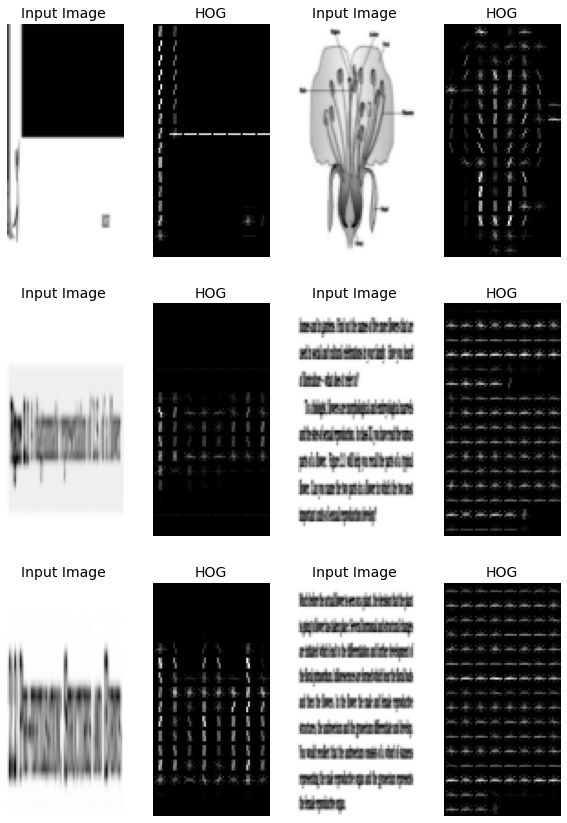

In [ ]:
#importing required libraries
from skimage.io import imread, imshow
from skimage.transform import resize
from skimage.feature import hog
from skimage import exposure
import matplotlib.pyplot as plt
%matplotlib inline
i=1
# plt.figure(figsize=(10,20))
list_hog_fd = []
# list_hog_image=[]
plt.figure(figsize=(10,30))
for block in blocks:
  block = resize(block, (128,64))
  fd, hog_image= hog(block, orientations=9, pixels_per_cell=(8,8),cells_per_block=(2, 2), visualize=True)
  list_hog_fd.append(fd)

  # list_hog_image.append(hog_image)

  # Rescale histogram for better display 
  hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))
  
  plt.subplot(len(blocks),4,i)
  plot_image(block,f"Input Image ")
  plt.subplot(len(blocks),4,i+1)
  plot_image(hog_image,"HOG")
  i=i+2

hog_features = np.array(list_hog_fd, 'float64')
plt.show()


In [ ]:
# import joblib
# sv = joblib.load('./Model.pkl')
# from sklearn import preprocessing
# hog_features = np.array(list_hog_fd, 'float64')
# test = preprocessing.normalize(hog_features)
# y_pred_test = svclassifier.predict(test)
# print(y_pred_test)

# Classify


In [ ]:
def classification_display(y_pred):
  plt.figure(figsize=(20,10))
  for i in range(0,len(blocks)):
    plt.subplot(4,2,i+1)
    title="text"
    if(y_pred[i]==0):
      title="non text"
    plot_image(blocks[i],title )
    
  plt.show()

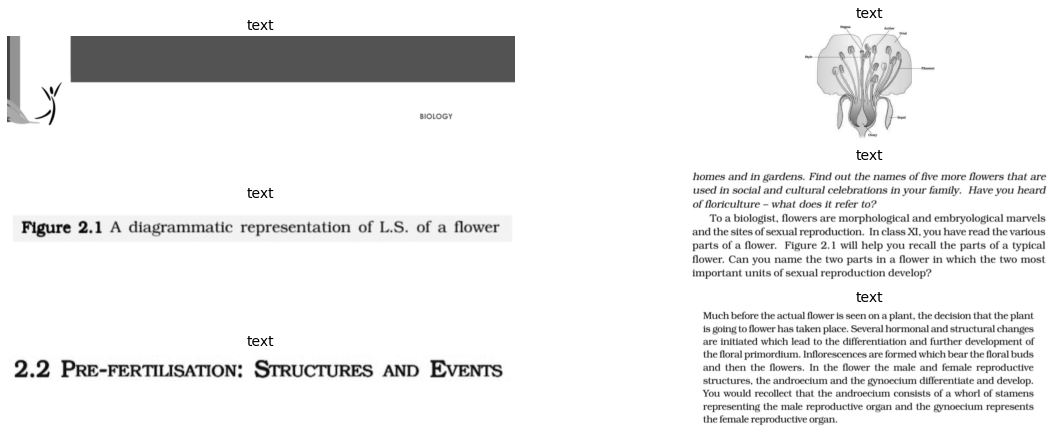

In [ ]:
y_pred_mlp = mlp.predict(hog_features)
classification_display(y_pred_mlp)

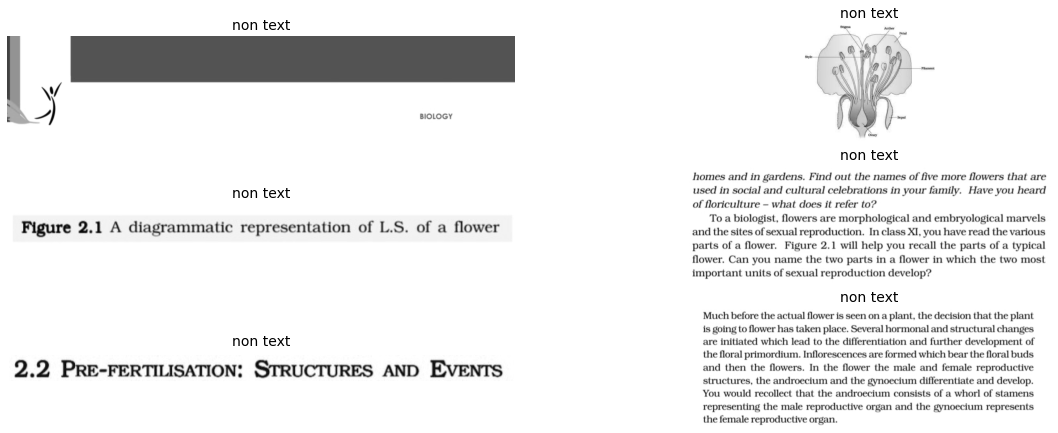

In [ ]:
y_pred_svm=svclassifier.predict(hog_features)
classification_display(y_pred_svm)

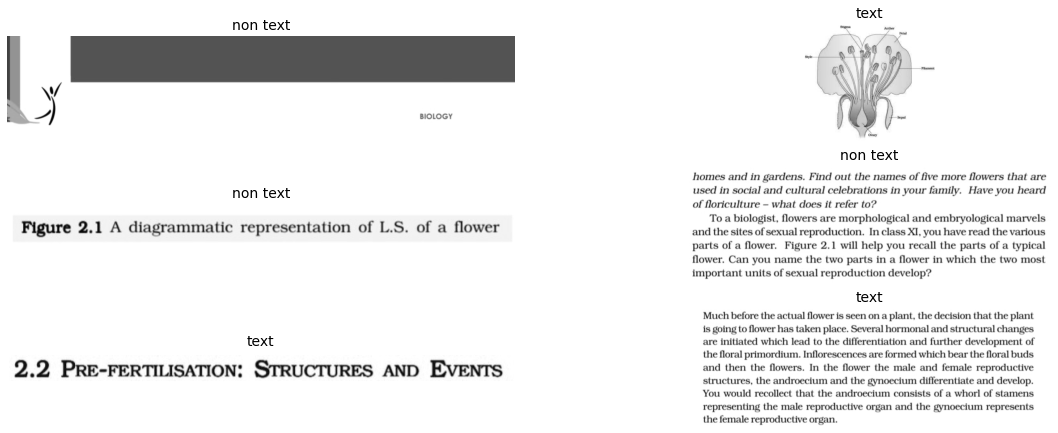

In [ ]:
y_pred_rf=rfclassifier.predict(hog_features)
classification_display(y_pred_rf)

